# Read me
This template is meant to be a starter for your customized DREEM output data analysis.

- To install this library, please check the installation on the [Git repo](https://github.com/yvesmartindestaillades/NAP).
- To learn how to use this library, please get through the [tutorial](tutorial.ipynb).


# Turner overthrown

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from os.path import exists, dirname
import os, sys
from nap import *
try:
    sys.path.append(dirname('libs/dreem/dreem')) 
except:
    "If dreem isn't installed on your computer, the code won't run"
    

# Step 1: Data wrangling
### Step 1.1: Define your study and some basics about your project

In [2]:
# Set your username for the database (at the moment, keep Yves)
username = 'Yves'

# Select your study
study = 'salt' 

## Set your base coverage high-pass filter value
min_bases_cov = 1000 

# Set the resolution for the plots
mpl.rcParams['figure.dpi'] = 200 # the highest the resolution, the slowest the plotting

# Depending on the study you select, you'll get a series of tubes. You can also create new studies using this dictionary.
# Here's an example.
tubes_per_study = {   
    'replicates':           ['C5', 'A4', 'F4', 'A6', 'A7'],
    'salt':                 ['A6', 'B6', 'C6', 'D6', 'E6'], 
    'temperature':          ['D7', 'E7', 'F7', 'G7', 'H7', 'A8', 'B8', 'C8'], 
    'magnesium':            ['F6', 'G6', 'H6', 'A7', 'B7', 'C7'],
    '60 mM DMS kinestics':  ['D8', 'E8', 'F8', 'G8', 'H8', 'A9'],
    'all_tubes': [ele for ele in [f"{a}{b}" for a in string.ascii_uppercase[0:8] for b in range(1,11)] \
                 if ele not in ['C3','C10','D10','E10','F10','G10','H10', 'E4']]
                 + ['C5_realignment_v3']
    }

conditions_per_study = {
    'temperature': {
        'unit':'C',
        'values':[5, 10, 25, 45, 55, 65, 75, 90]
    },
    '60 mM DMS kinestics': {
        'unit':'min',
        'values':[1, 3, 9, 27, 81]
    }
} 

tubes = tubes_per_study[study]

### Step 1.2: Process new pickle files and push them to Firebase
- Select which tubes you want to push to Firebase.
To plot automatically arrays of tubes, see [tutorial](tutorial.ipynb), section 3.2.
- Process tubes and push them to Firebase.

In [3]:
## Pickle files to process and to push to Firebase
pickles_list = [] # Can be tubes if you want to process the tubes from your study

pickles = data_wrangler.generate_pickles(path_to_data='data/FULLSET',
                                         pickles_list=pickles_list)

# Indicate the location of your RNA structure file
RNAstructureFile = 'data/RNAstructureFile.csv'

# Default location for your local database (JSON file)
json_file = 'data/db.json'


# If the user gives some new pickles files, push them to the firebase, then pull the entire firebase
if len(pickles):
    firebase.push_pickles(pickles = pickles,
                        RNAstructureFile = RNAstructureFile,
                        min_bases_cov = min_bases_cov, 
                        username=username)

### Step 1.3: Pull the data from the Firebase and clean/reformat it.
`df` is used for the analysis. Each of the construct have above 1000 reads for each tube.     
`df_full` is used for quality quality analysis. It has all constructs above 1000 valid reads for each tube individually.

In [4]:
# Pull the firebase
df_rough = firebase.load(tubes=tubes, username=username)
data_wrangler.dump_dict_json(JSONFileDict=json_file,
                                        df=df_rough)

# Clean and reformat the dataset
df, df_full = data_wrangler.clean_dataset(df_rough=df_rough,
                                             tubes=tubes, 
                                             min_bases_cov=min_bases_cov)

Load data from Firebase
D7 E7 F7 G7 H7 A8 B8 C8 Done!
Dumping df as a dict to a JSON file data/db.json
Done!


/home/ymdt/NAP/nap.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full['tubes_covered'].loc[construct[1].index] = construct[1]['full_sequence'].count()


43 constructs were dropped because deltaG was 'void'
108 constructs have more than 1000 reads for each base of their ROI on each tube


# Step 2: Data quality analysis

It's always hard to realize that you were analysing noise. Here, we'll get through a series a plot to check the data sanity.

### Get the list of tubes and constructs:

In [ ]:
print(f"tubes are: {tubes}")
print(f"constructs are: {df.construct.unique()}")

### Explore the data
`get_roi_info(df=df, tube=tube, construct=construct)` gives information about the Region of Interest (ROI) of a (tube, construct) pair.

In [6]:
# Select a (tube, construct) pair
tube = tubes[0] 
construct = df.construct.unique()[0]

get_roi_info(df=df, tube=tube, construct=construct).xs((True, '0'),level=('paired','roi_structure_comparison'))

mut_rate  roi_deltaG
base index                      
C    73     0.000406       -25.2
     74     0.000811       -25.2
A    75     0.000406       -25.2
C    76          0.0       -25.2
     77          0.0       -25.2
T    78     0.000404       -25.2
G    79          0.0       -25.2
T    80          0.0       -25.2
A    81     0.000405       -25.2
T    82     0.000809       -25.2
A    83     0.000409       -25.2
T    84          0.0       -25.2
A    85          0.0       -25.2
T    86          0.0       -25.2
C    87          0.0       -25.2
G    88     0.000409       -25.2
C    93          0.0       -25.2
G    94     0.000412       -25.2
A    95          0.0       -25.2
T    96          0.0       -25.2
A    97          0.0       -25.2
T    98          0.0       -25.2
A    99     0.000414       -25.2
T    100         0.0       -25.2
A    101         0.0       -25.2
C    102    0.000417       -25.2
A    103    0.000419       -25.2
G    104    0.002983       -25.2
     105         0.0       -25.2
T    106         0.0       -25.2
G    107         0.0       -25.2
     108    0.000437       -25.2

### Plot the base coverage per construct distribution

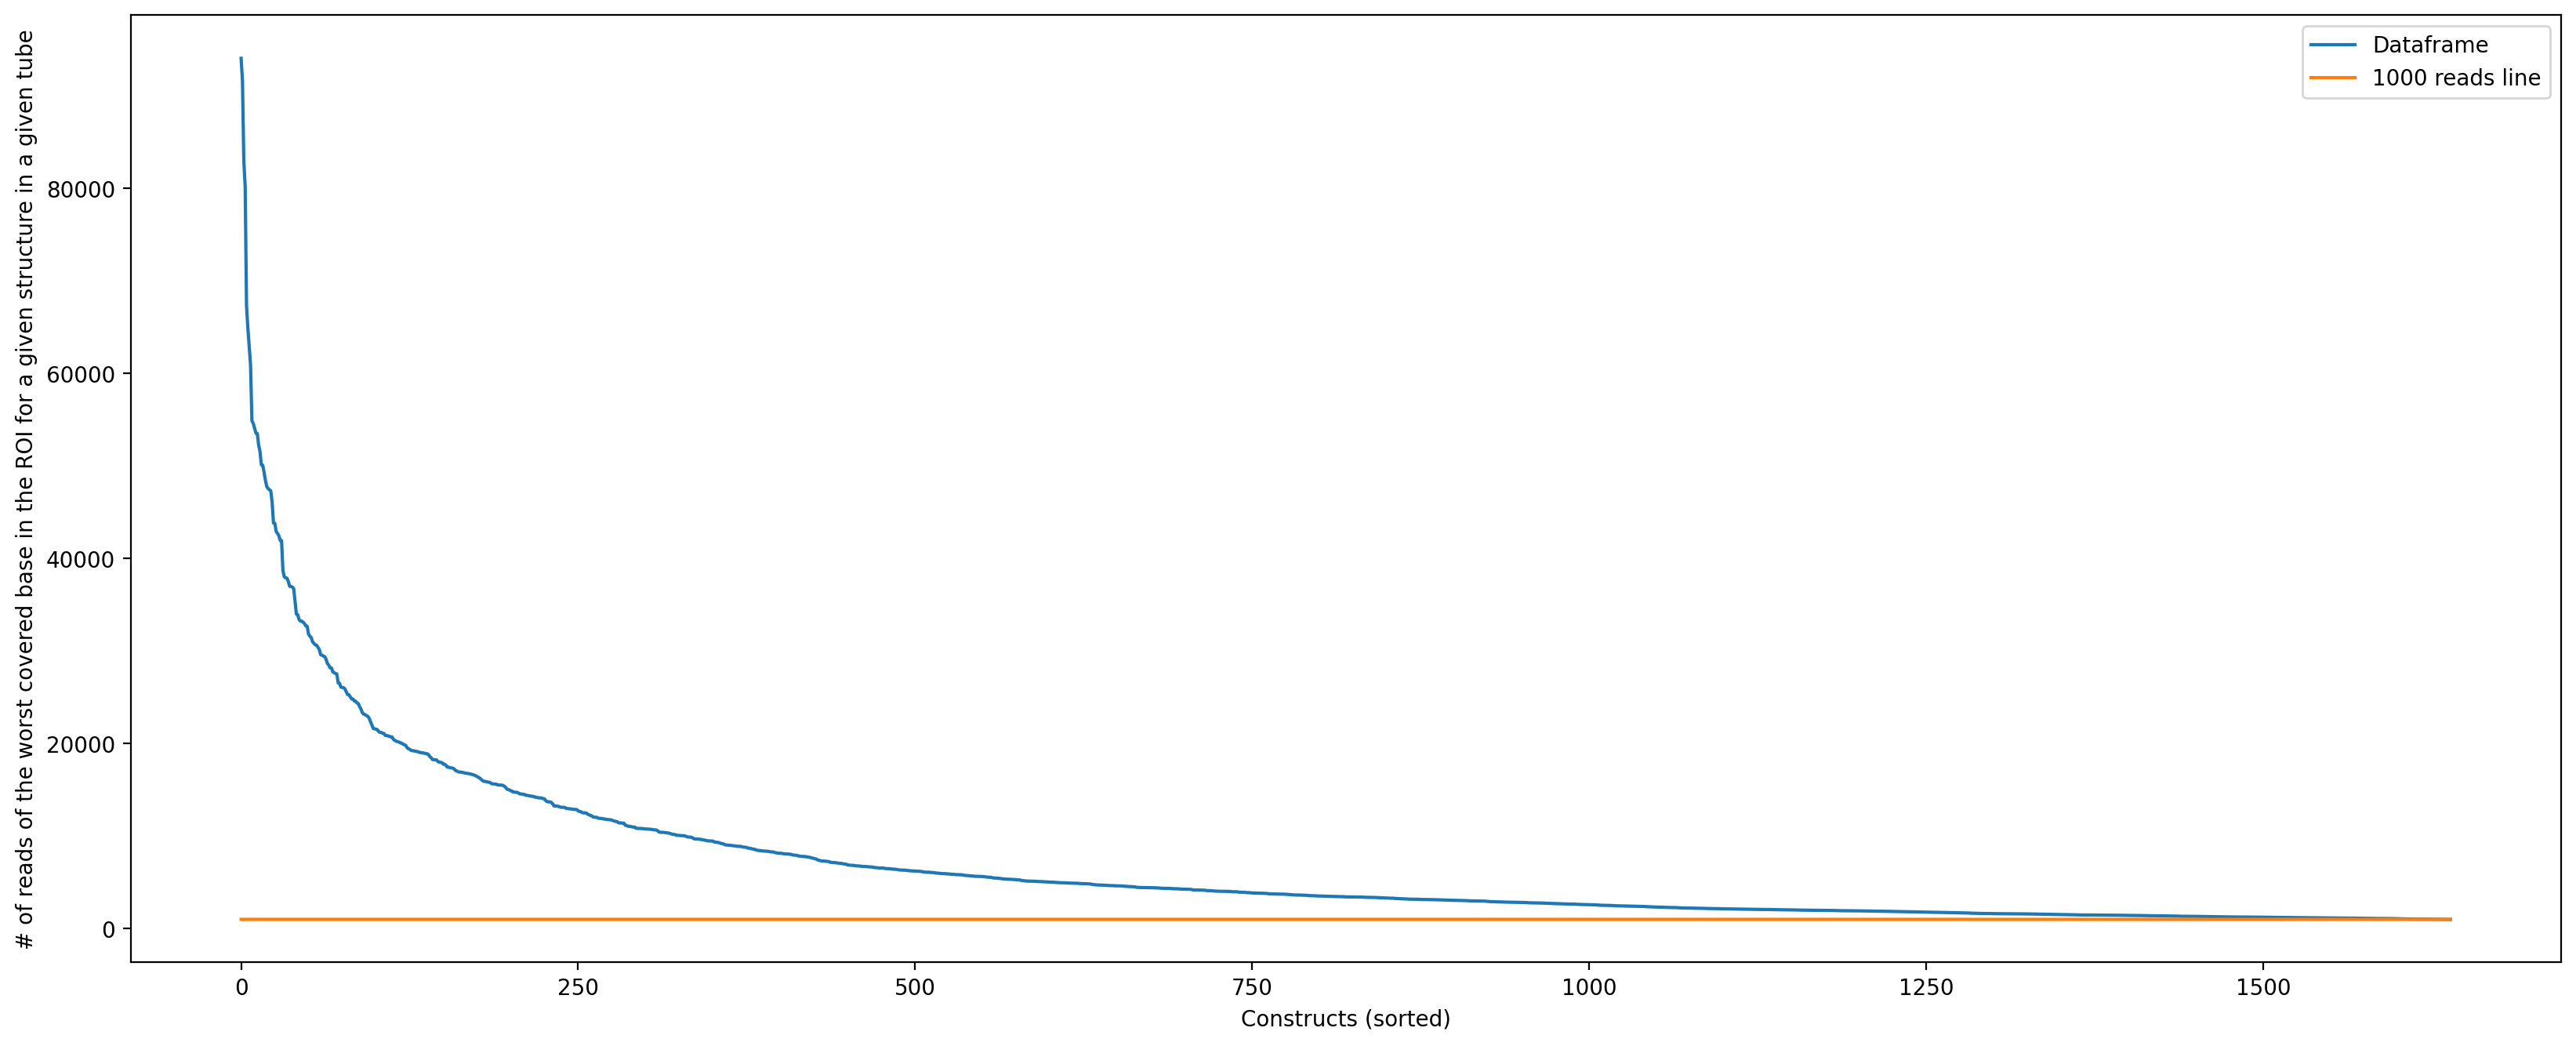

In [7]:
plot.base_coverage_for_all_constructs(df=df_full, 
                                      min_bases_cov=min_bases_cov)

### Sanity-check construct-wise base coverage plots
Plot randomly picked sequences to check the quality of the data.

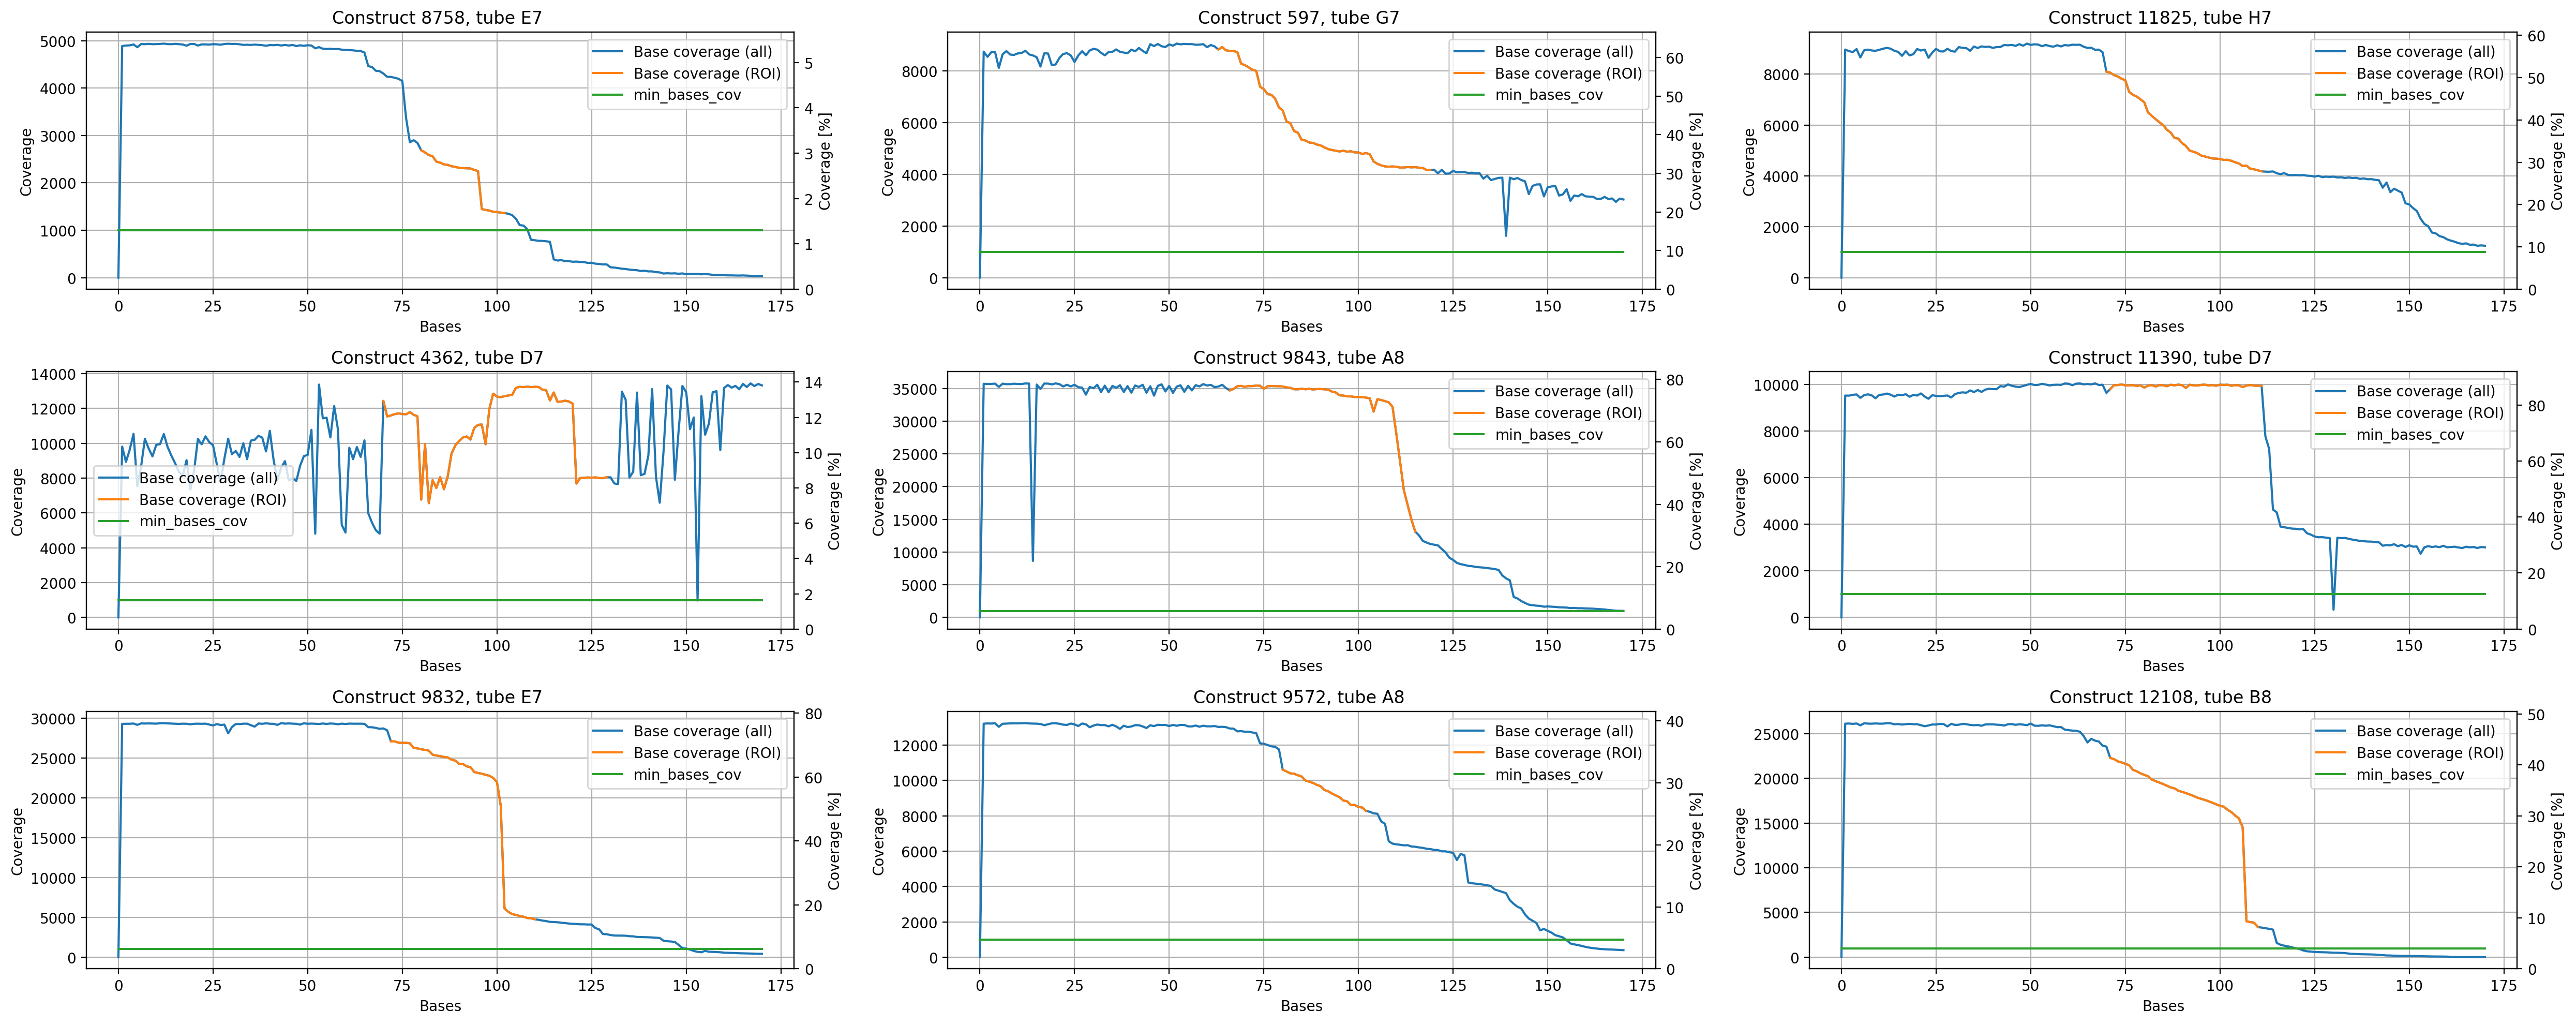

In [8]:
plot.random_9_base_coverage(df=df, 
                            min_bases_cov=min_bases_cov)

### Heatmap of the roi part coverage

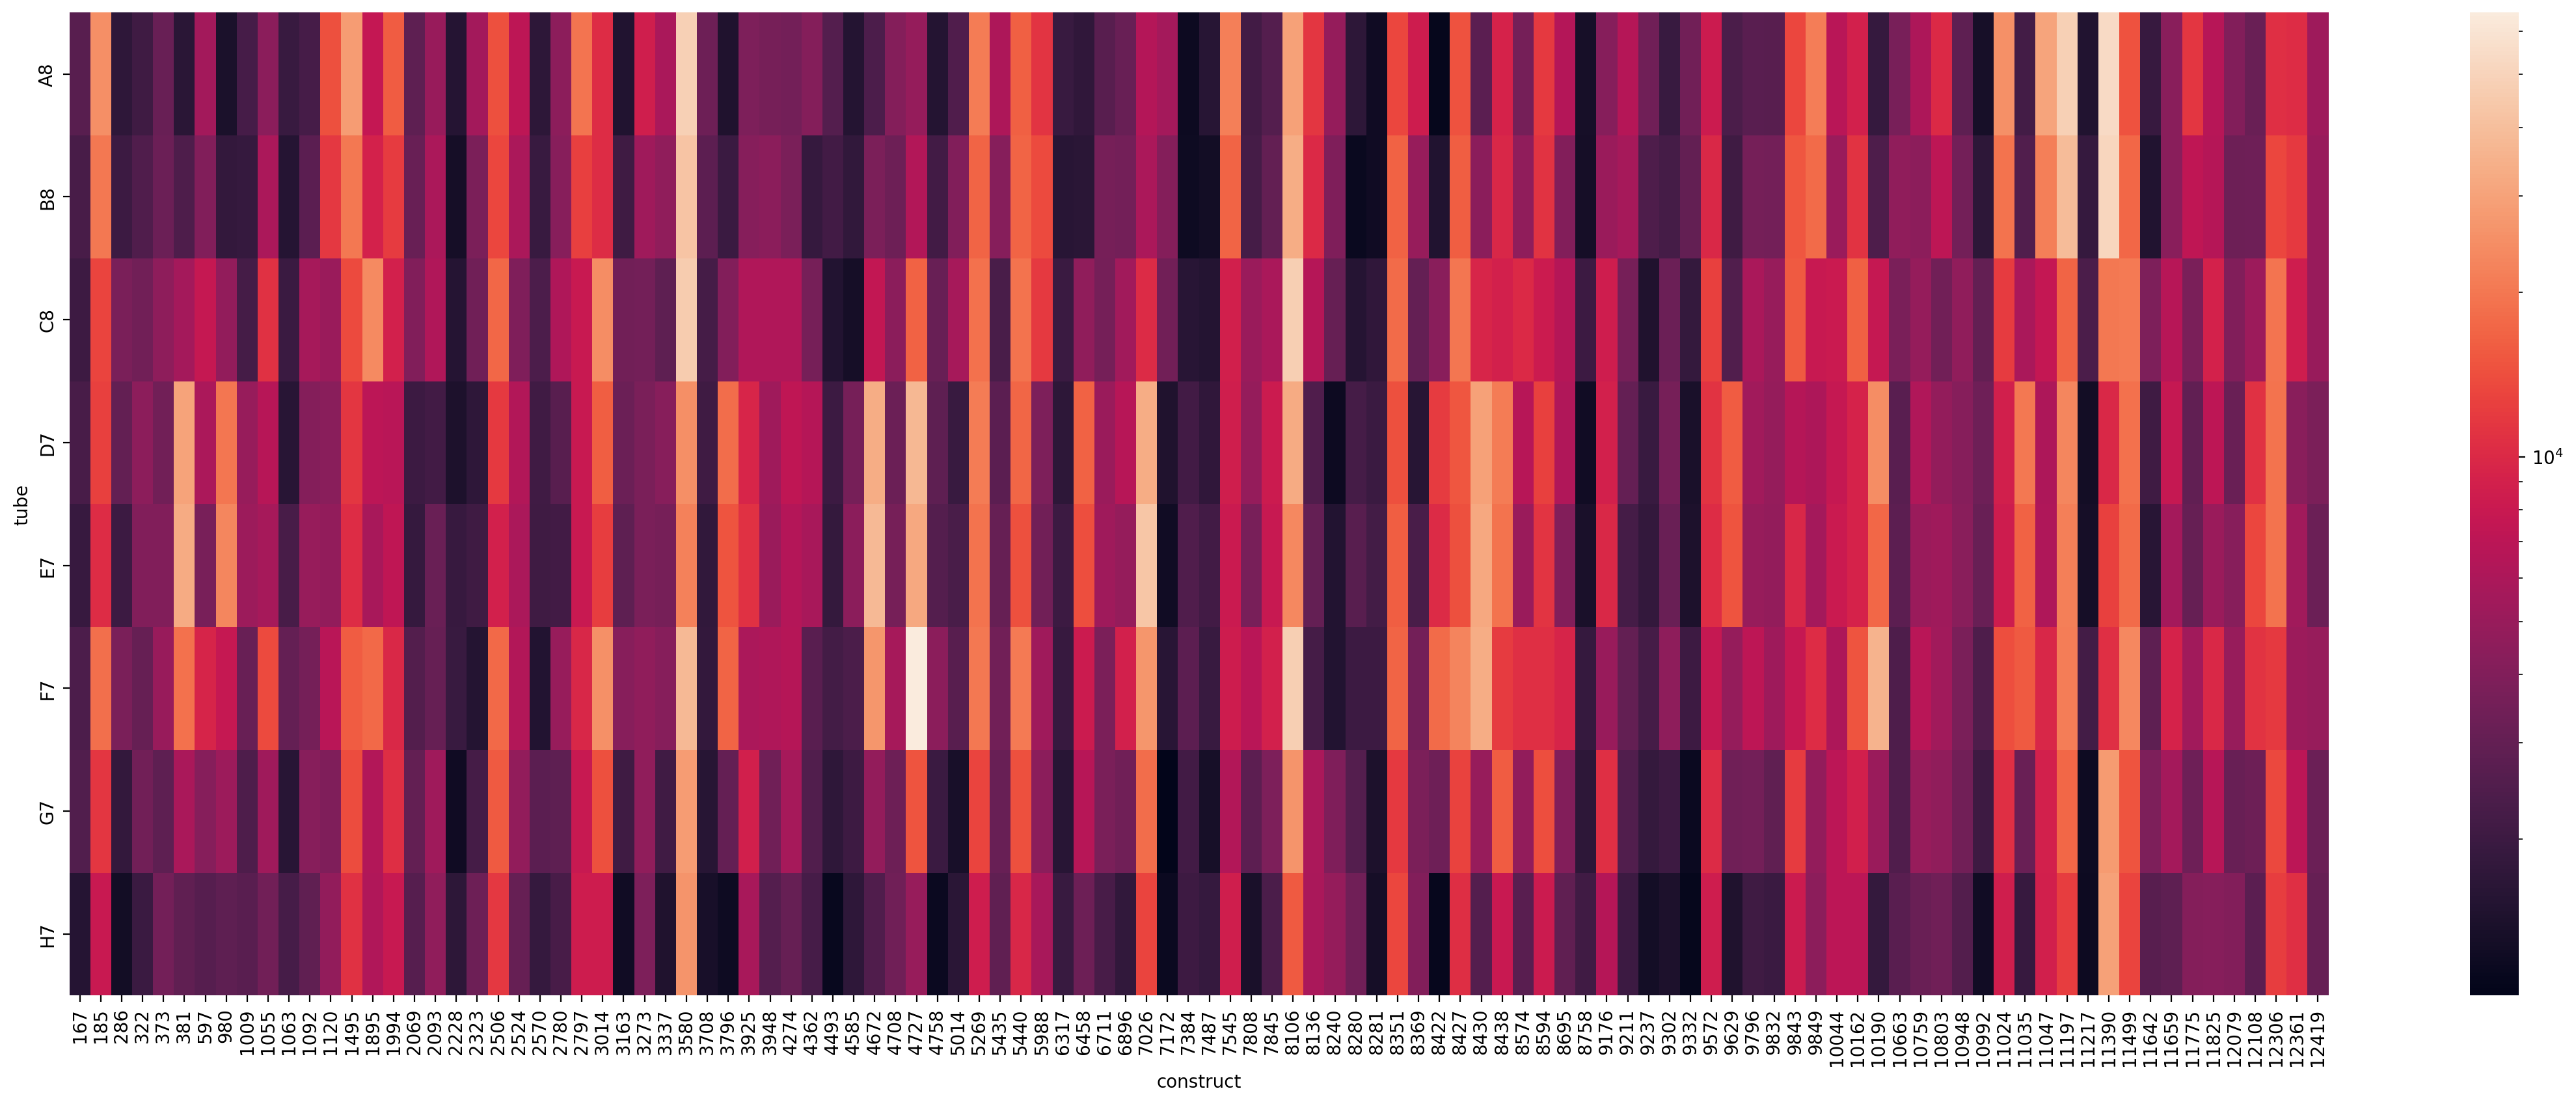

In [9]:
plot.heatmap(df = df, 
             column="cov_bases_roi")

### Heatmap of the second half coverage

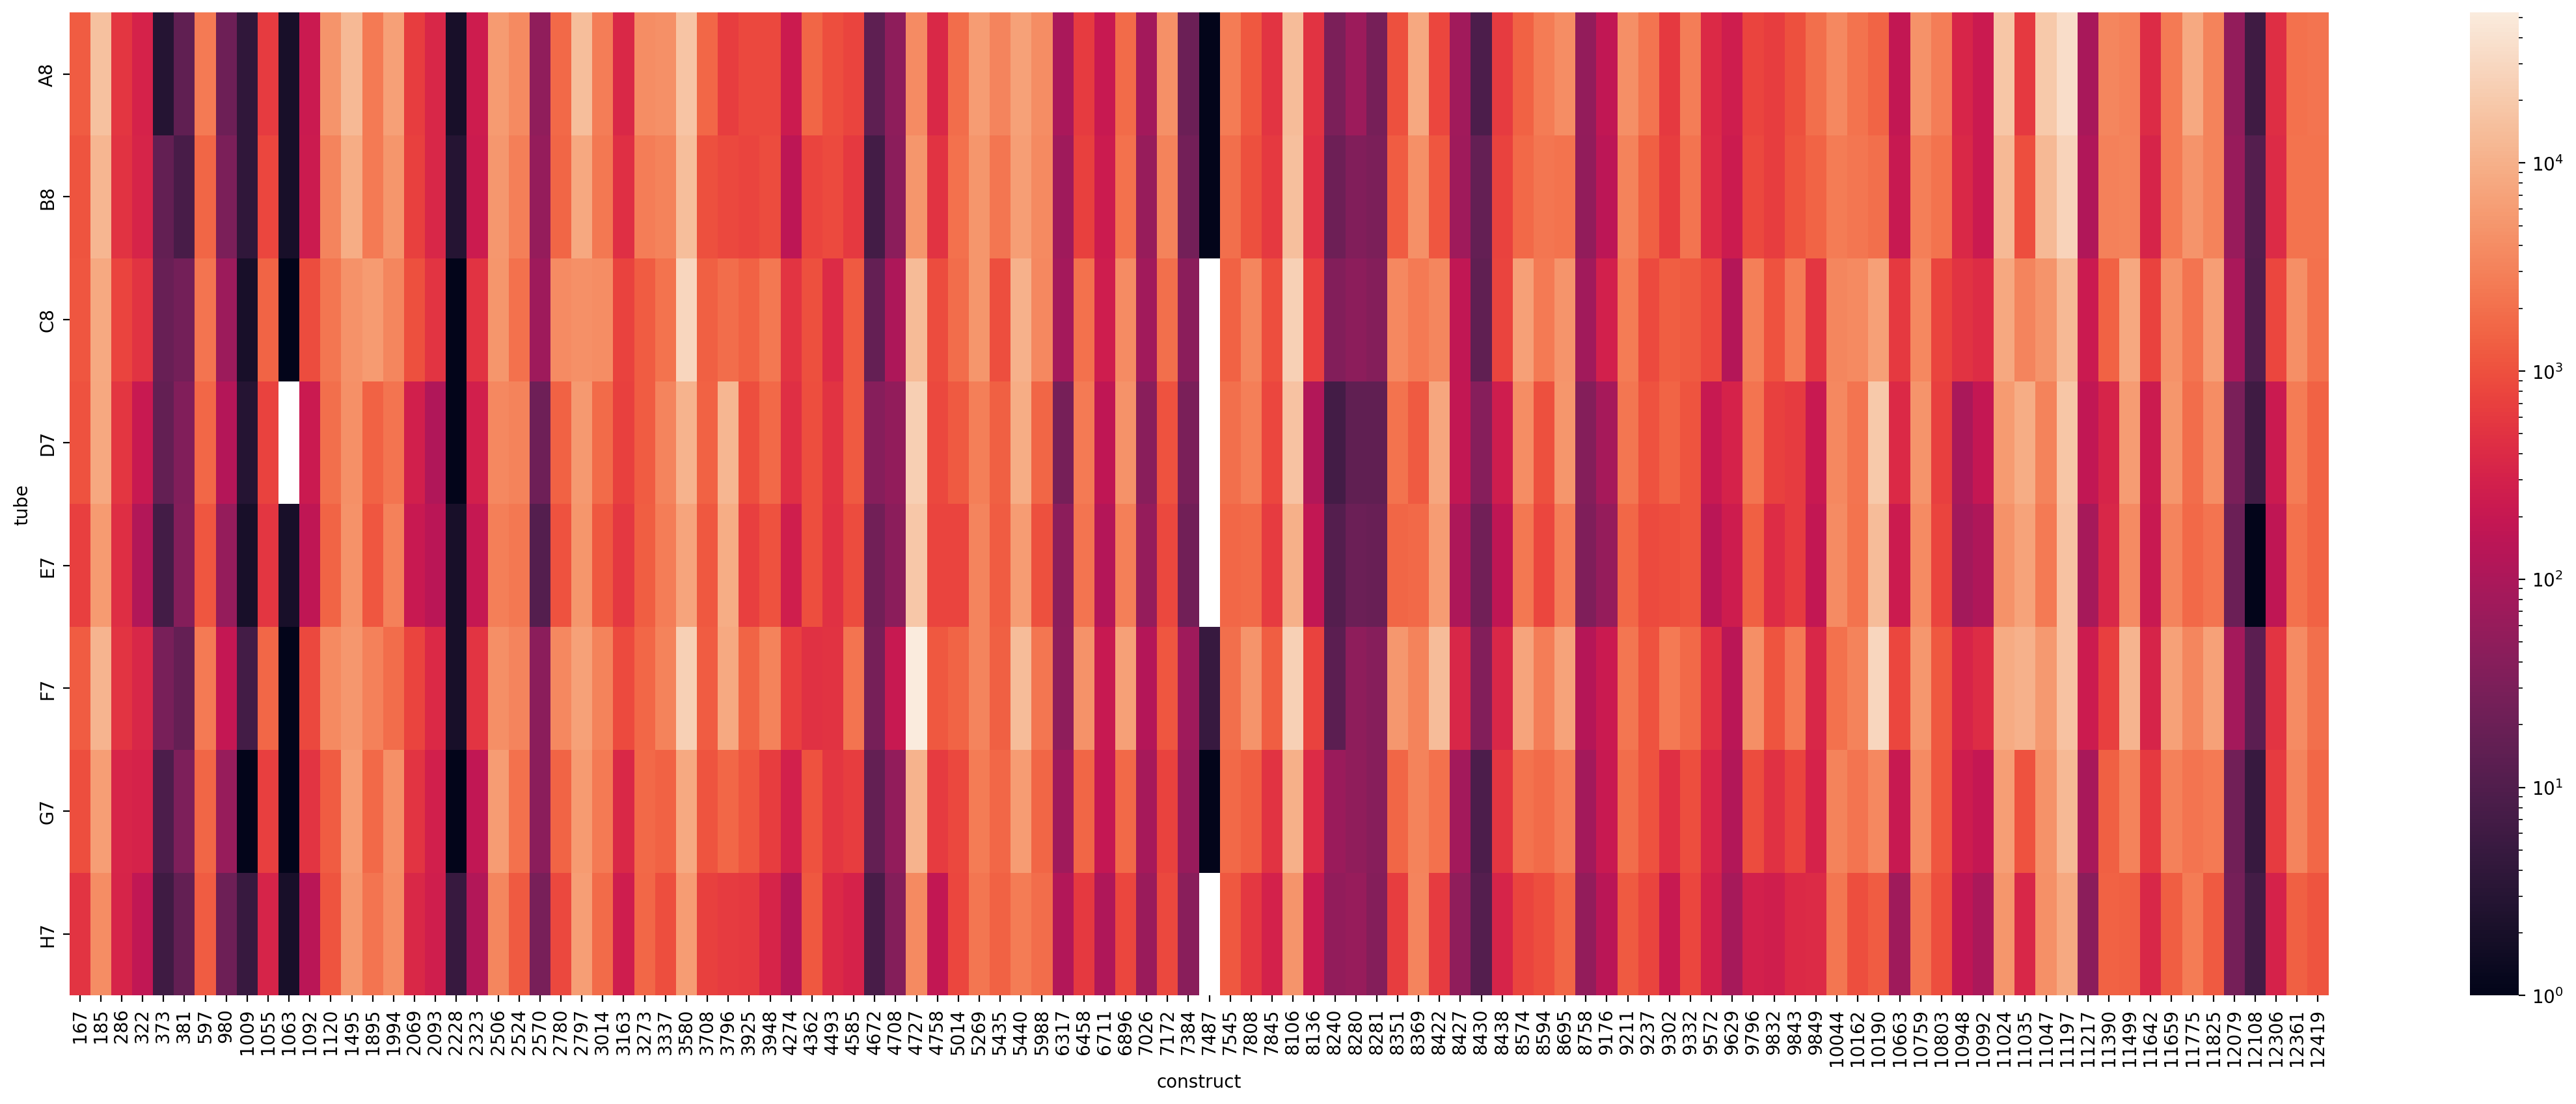

In [10]:
plot.heatmap(df = df, 
                column="cov_bases_sec_half")

# Step 3: Data analysis
In this part, we know that we read good data, and we want to visualize it through different plots.

### Analysis parameters

In [11]:
# Display the plots on this notebook? Not recommended if numerous plots
show_plots = True

# Tubes analyzed here 
tubes = tubes_per_study[study]

# Constructs used
a_few_constructs = df.construct.unique()[:3].tolist()
first_construct = df.construct.unique()[0].tolist()
constructs_per_name = {
    'all_constructs': df.construct.unique().tolist(),
    str(a_few_constructs) : a_few_constructs,
    str(first_construct): [first_construct]
}

# Select constructs here
constructs_name = str(a_few_constructs)

# Output the frame conditions
conditions = conditions_per_study[study]
constructs = constructs_per_name[constructs_name]

### Big script to run every selected function

In [12]:
# Analysis run in this script
analysis = {'base_per_base_partition':False,
            'base_per_base_sequence': True,
            'deltaG': True,
            'tube_comparison':False,
            'columns_csv': True,
            'deltaG_construct': True
            }

# Write here a script to get your plots 

### Mutation sequence-wise

`plot.mutation_rate(df, tube, construct, plot_type, index, normalize)` plots the mutation rate base-wise for a given construct of a given tube as a barplot. 
Arguments:
- `plot_type` :
    - `'sequence'` : each bar is colored w.r.t to the base of the original sequence.
    - `'partition'` : each bar shows the partition of into which bases this base mutates.
- `index`:
    - `'index'`: each base is identified with its position number
    - `'base'`: each base is identified with its type (A, C, G, T)

In [ ]:
for tube in tubes:
    for construct in constructs:
        plot.mutation_rate(df=df,
                           tube=tube,
                           construct=construct,
                           plot_type='sequence',
                           index='index')
        plot.save_fig(path=f"data/figs/date/{study}/mut_per_base/sequence/{construct}/", 
                    title=f"base_per_base_sequence_{tube}_{construct}")
        plt.close(not show_plots)

### DeltaG plots

/home/ymdt/NAP/nap.py:471: RuntimeWarning: invalid value encountered in true_divide
  mut_per_base = pd.DataFrame({'mut_rate':pd.Series(np.array(df_use[f"mut_bases"].loc[tube, construct][1:])/np.array(df_use[f"info_bases"].loc[tube, construct][1:]), dtype=object),
/home/ymdt/NAP/nap.py:471: RuntimeWarning: invalid value encountered in true_divide
  mut_per_base = pd.DataFrame({'mut_rate':pd.Series(np.array(df_use[f"mut_bases"].loc[tube, construct][1:])/np.array(df_use[f"info_bases"].loc[tube, construct][1:]), dtype=object),
/home/ymdt/NAP/nap.py:471: RuntimeWarning: invalid value encountered in true_divide
  mut_per_base = pd.DataFrame({'mut_rate':pd.Series(np.array(df_use[f"mut_bases"].loc[tube, construct][1:])/np.array(df_use[f"info_bases"].loc[tube, construct][1:]), dtype=object),


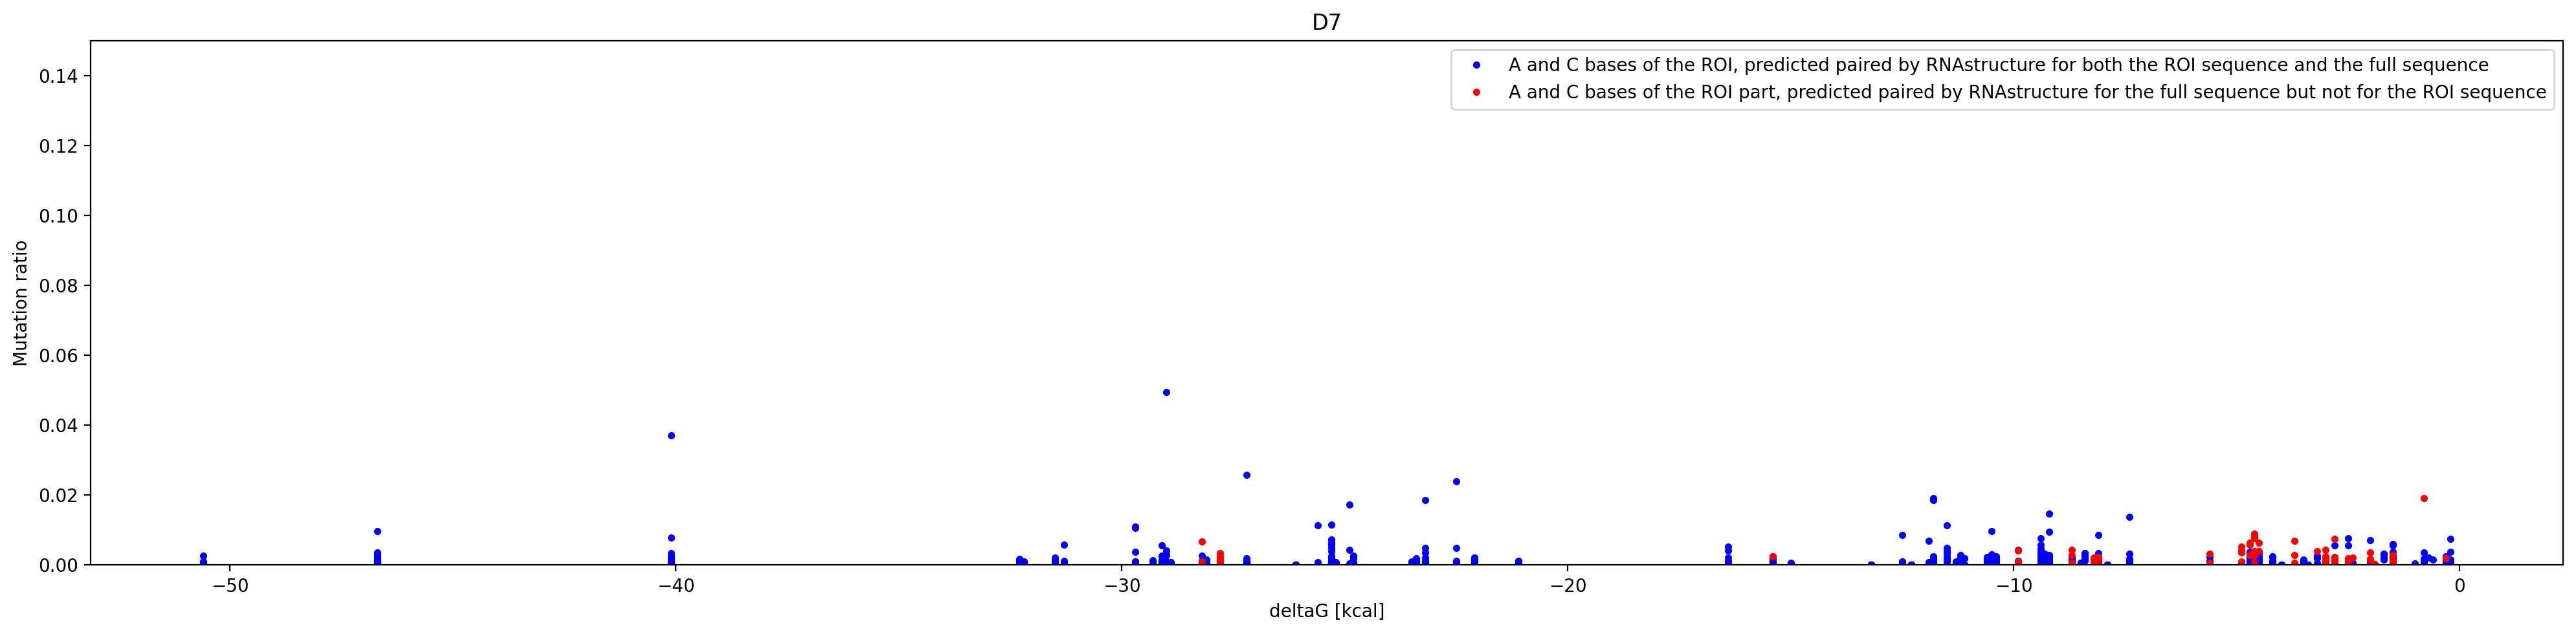

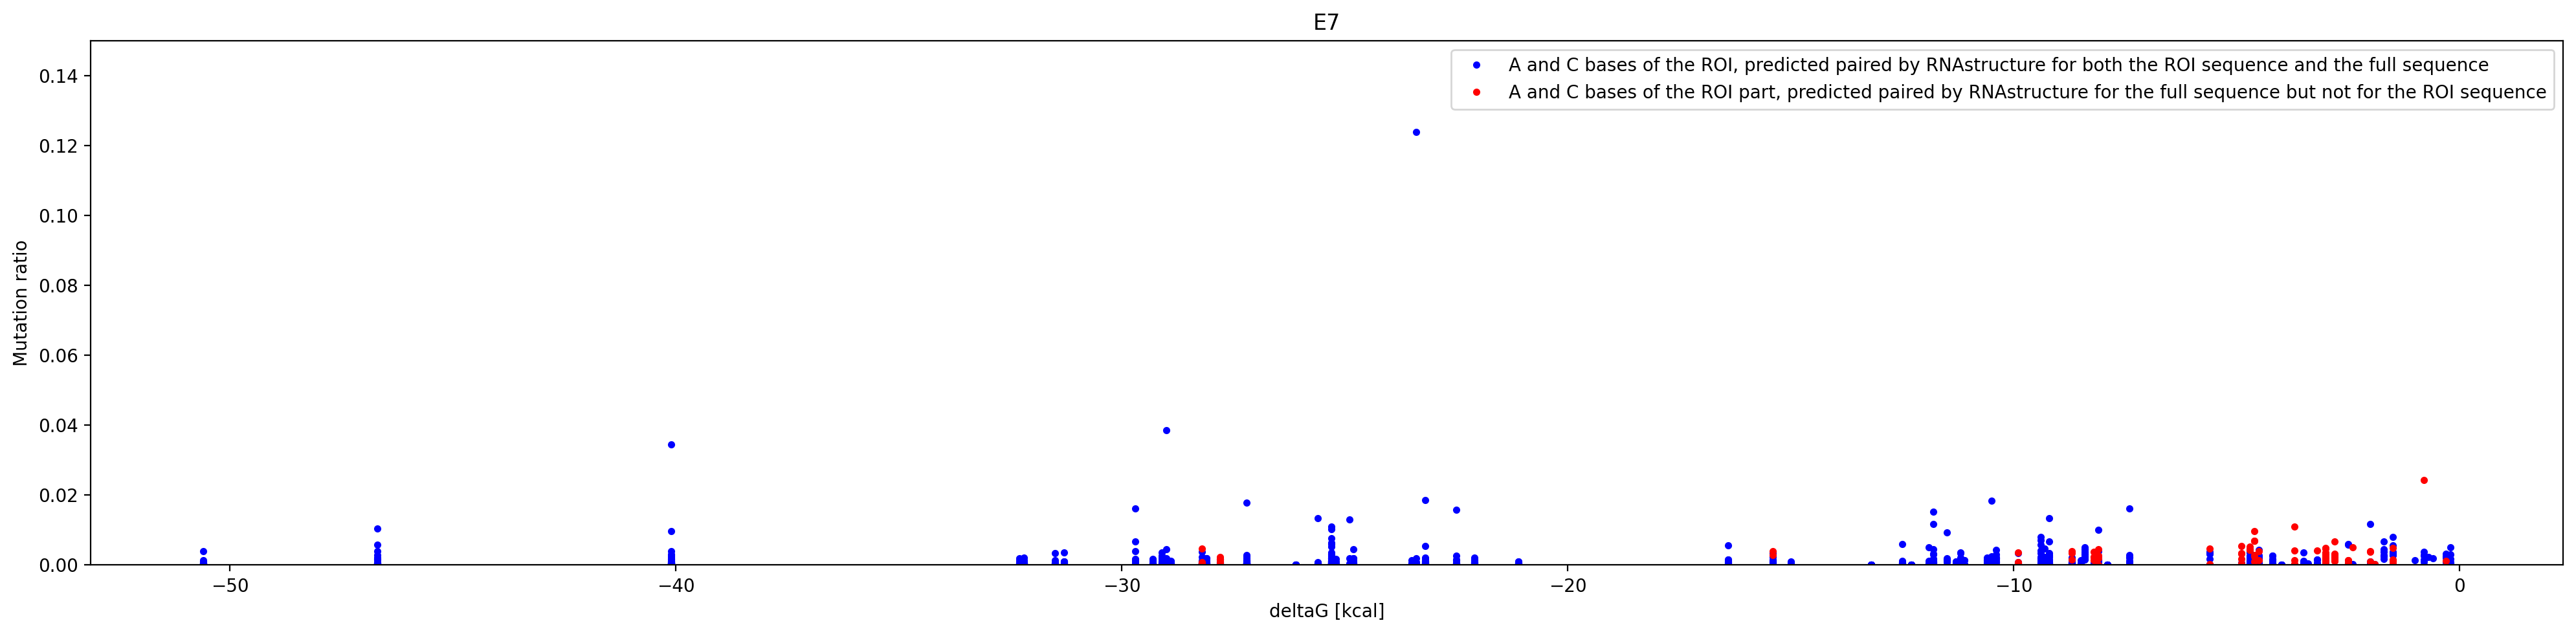

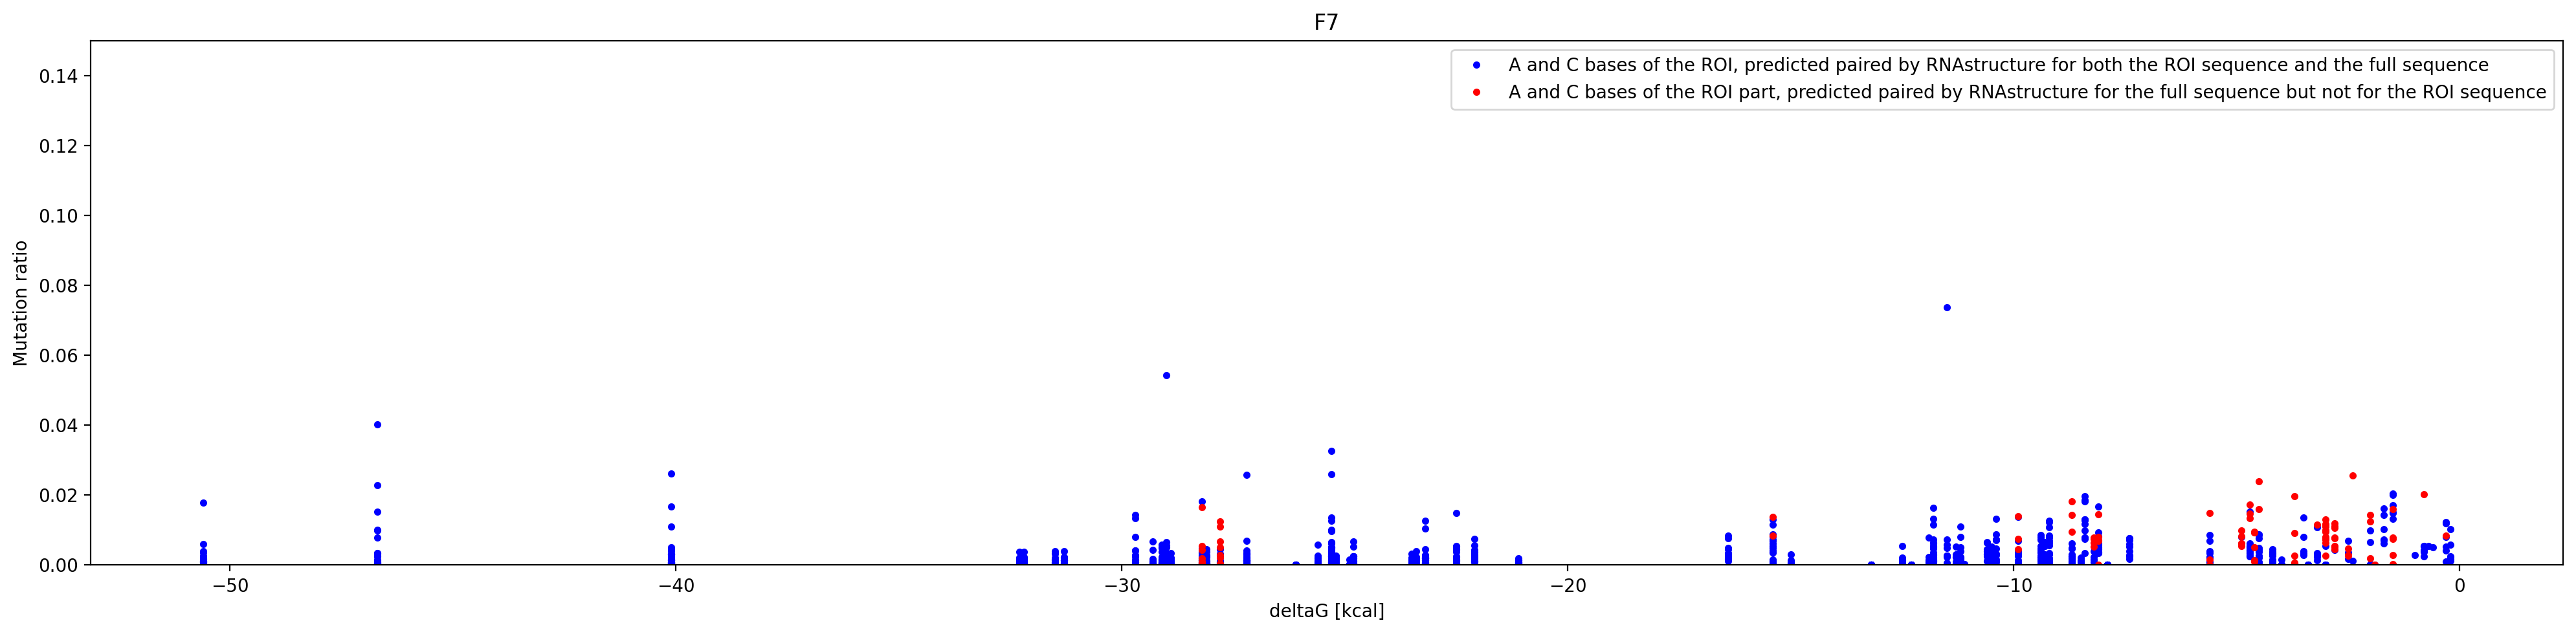

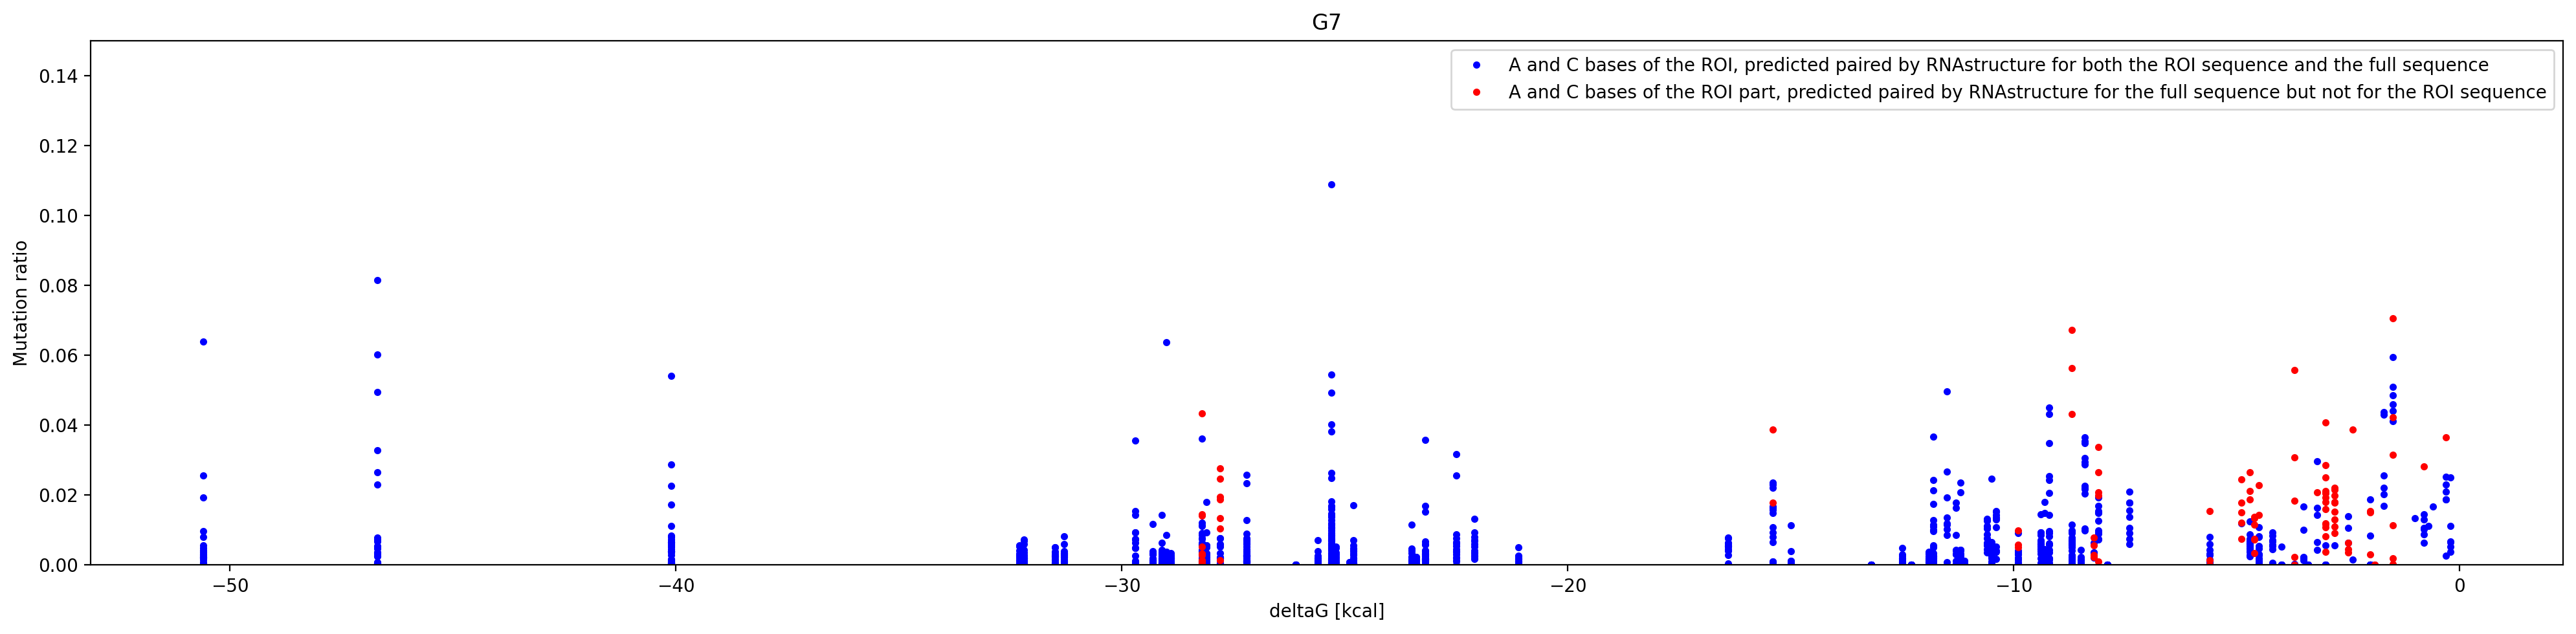

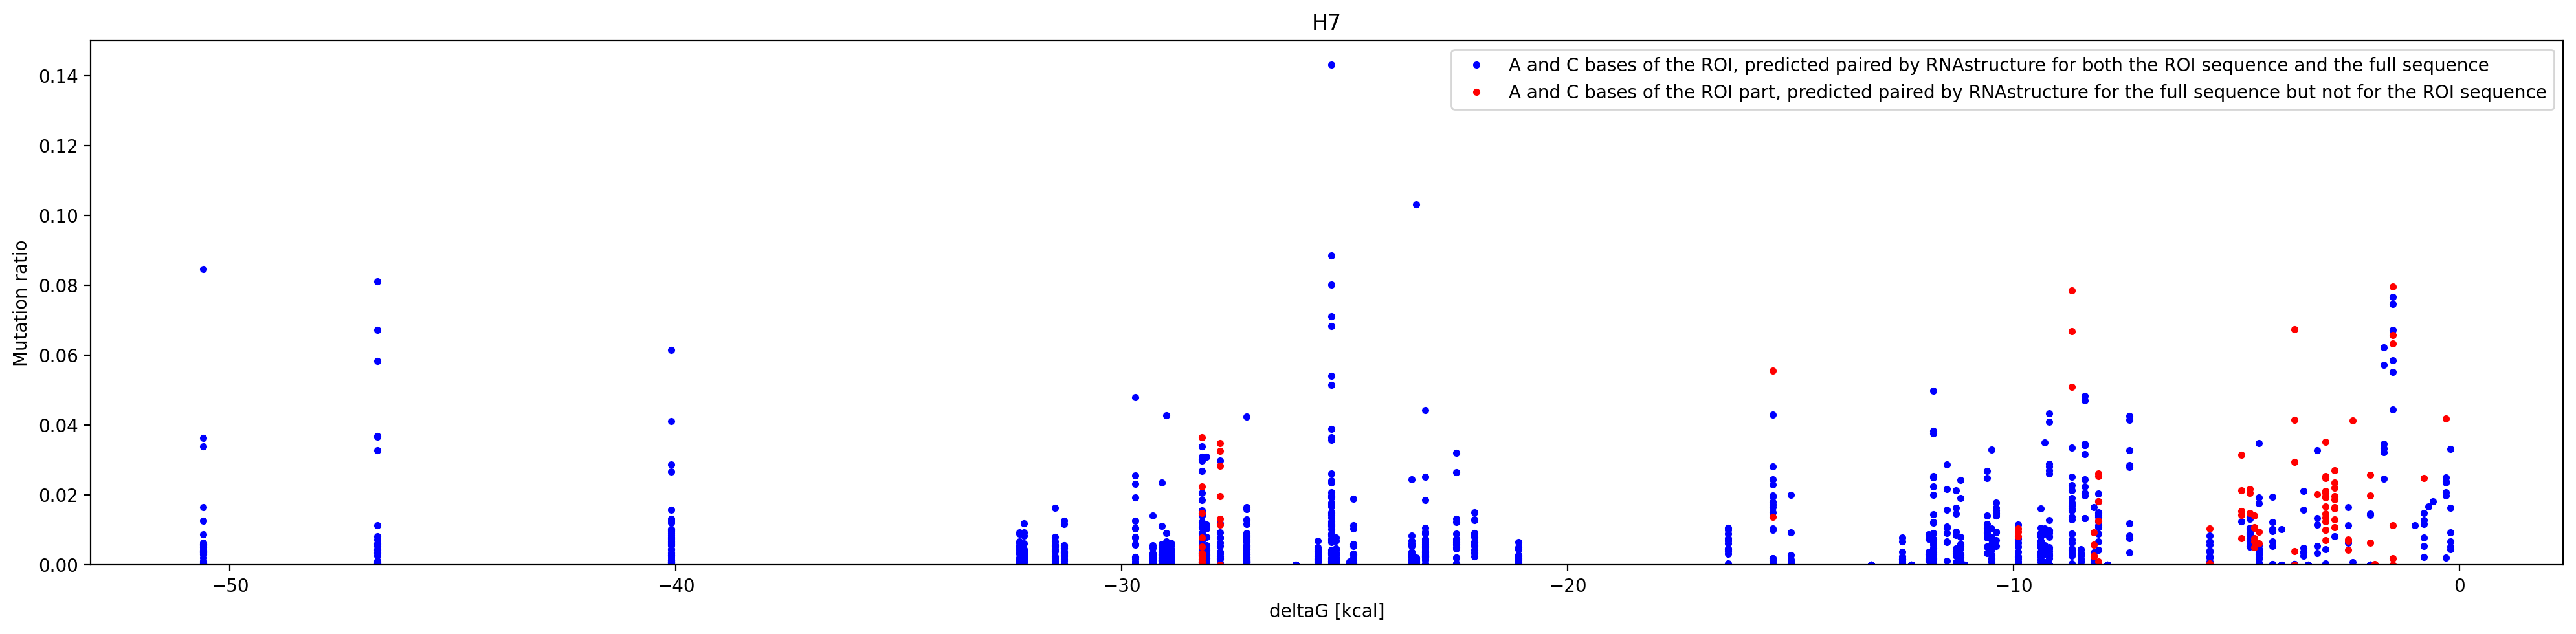

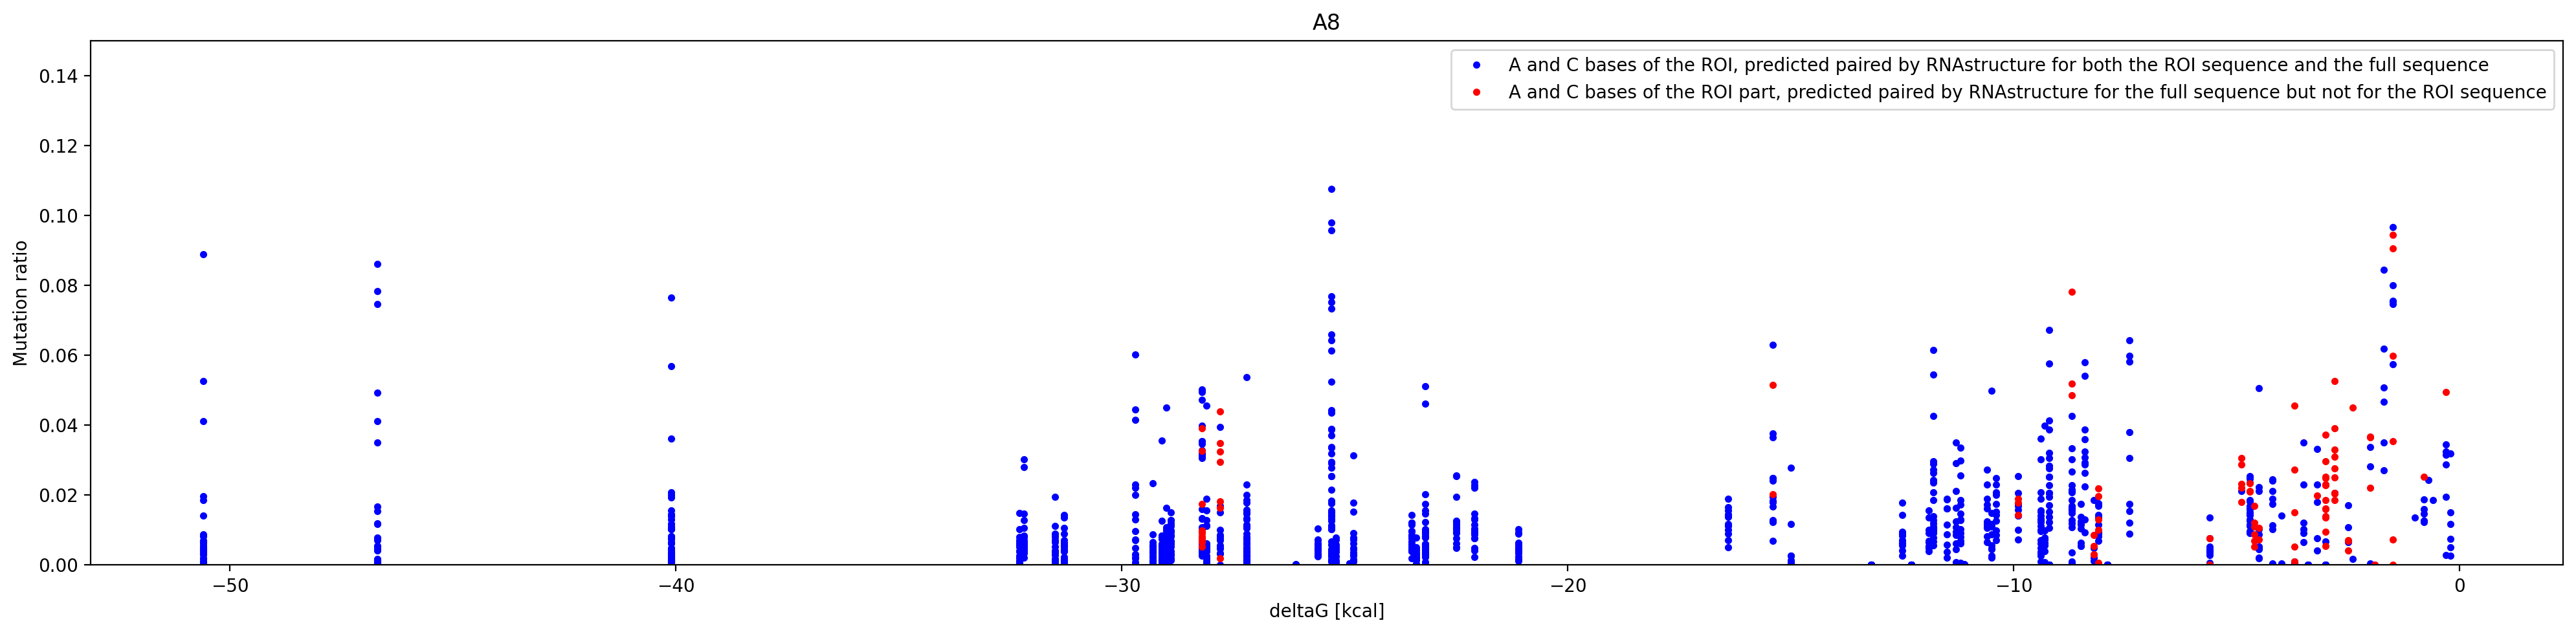

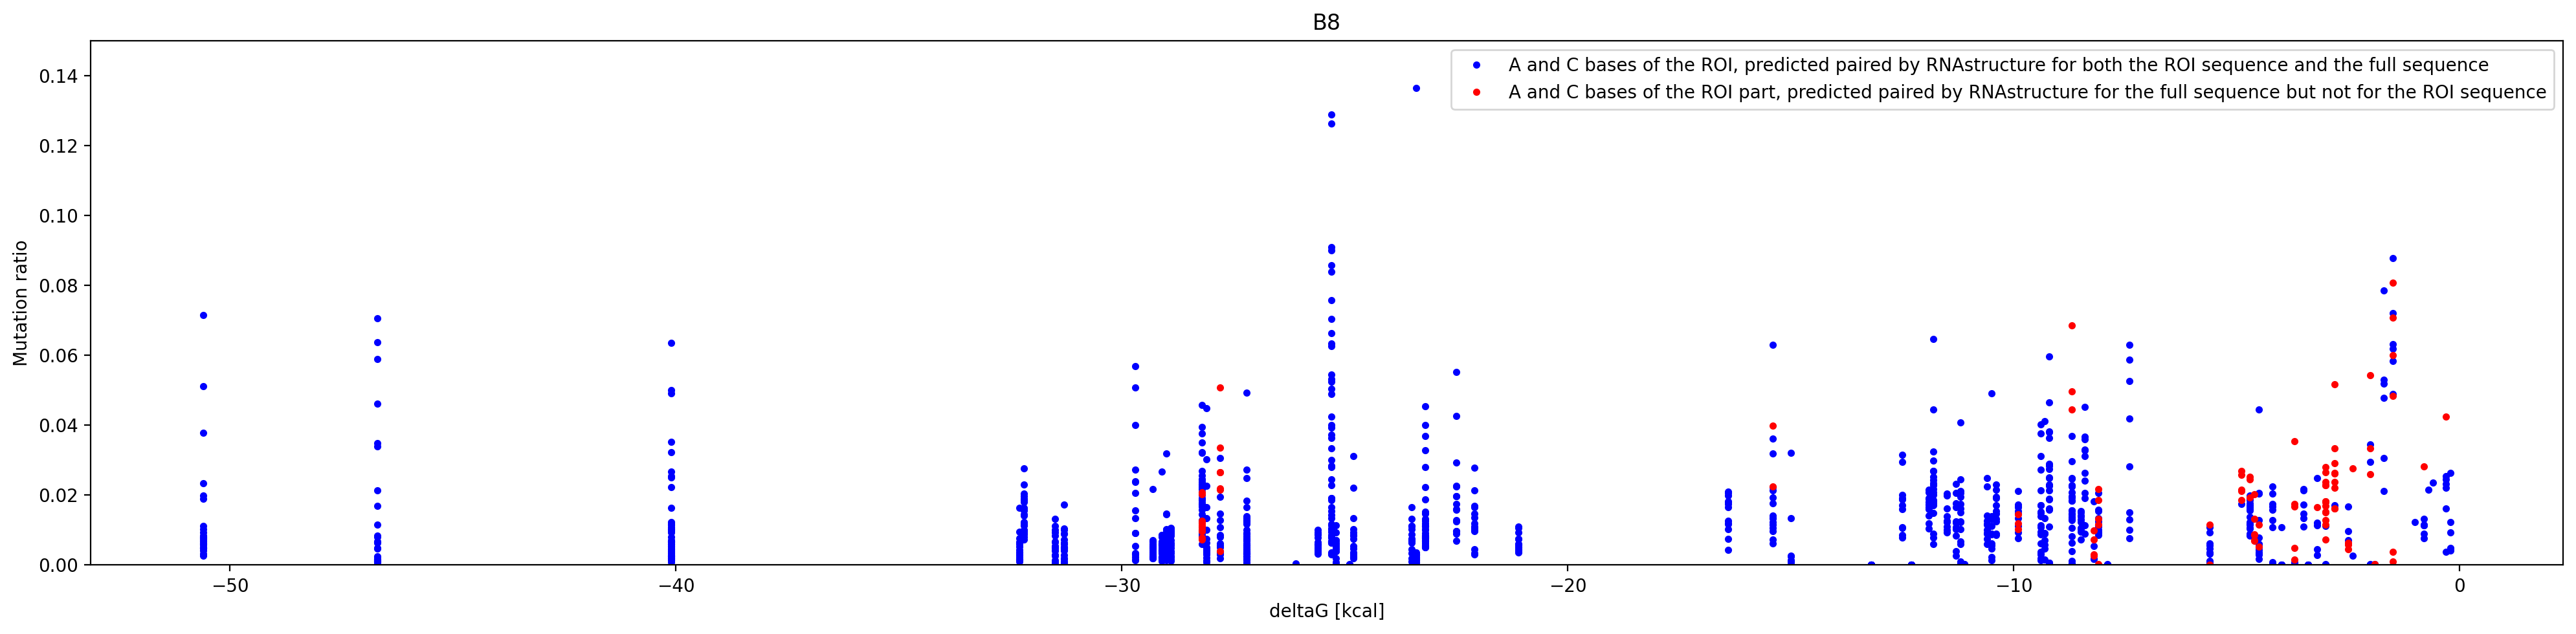

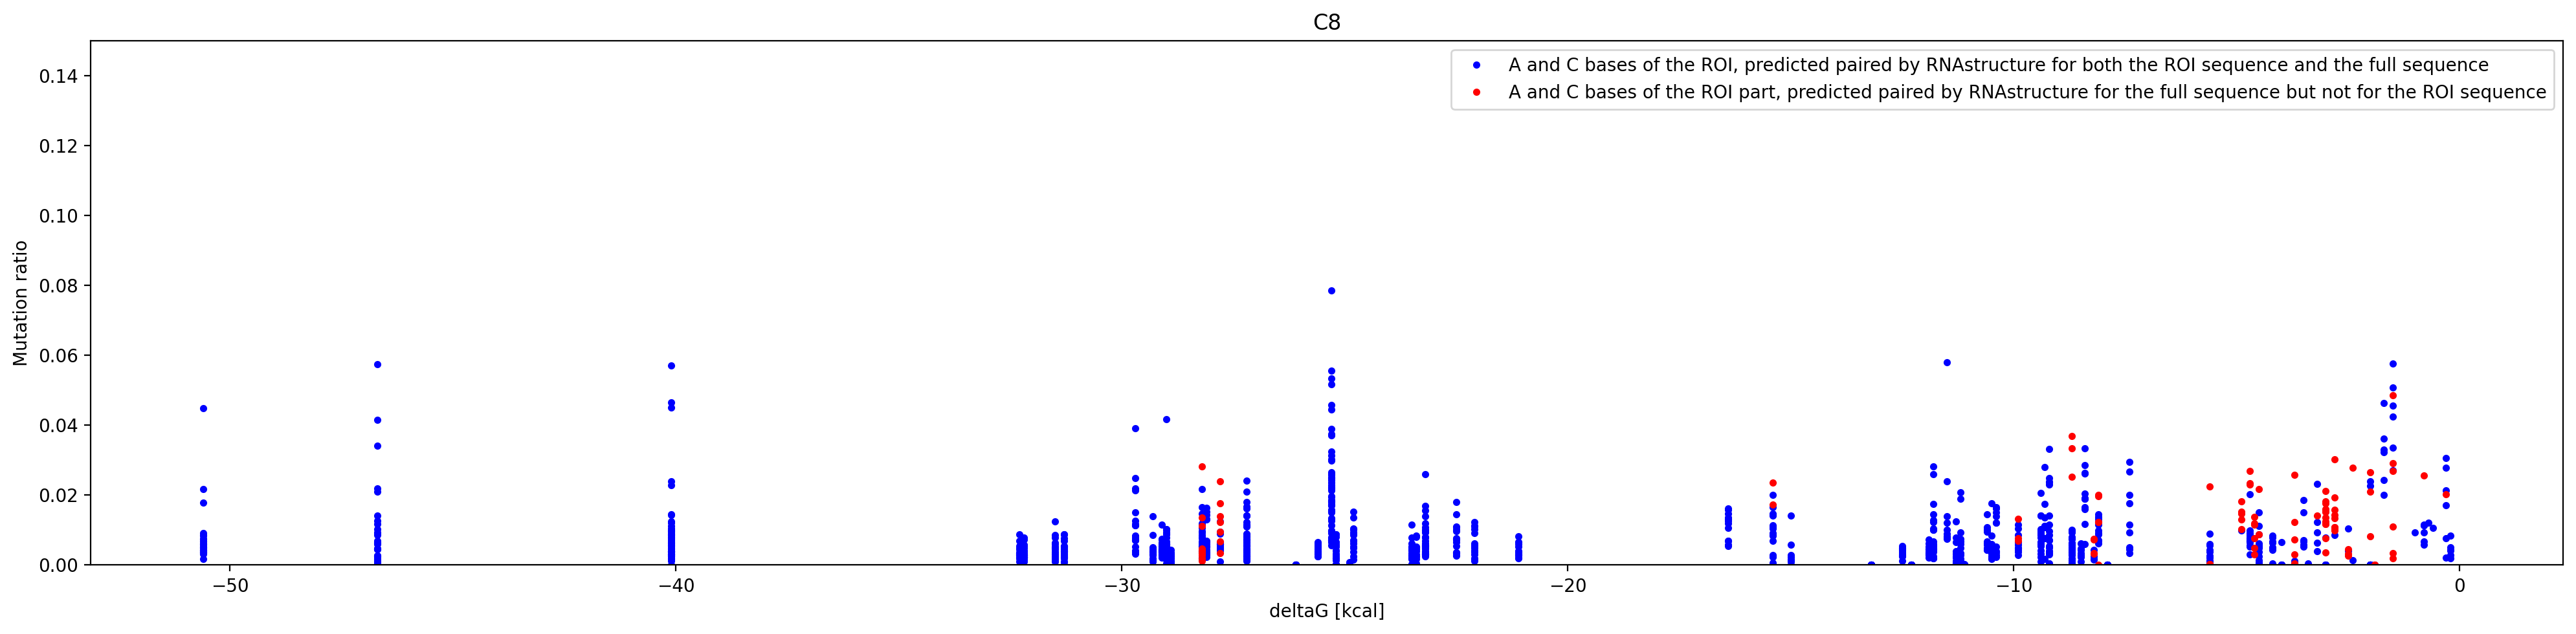

In [13]:
for tube in tubes:
    plot.deltaG(df=df, tube=tube)

    plot.save_fig(path=f"data/figs/date/{study}/deltaG/", 
             title=f"deltaG_{tube}")

    plt.close(not show_plots)

### Tubes correlation

In [ ]:
for construct in constructs:
        df_global_corr = plot.correlation_n_tubes(df, tubes, construct)
        plot.save_fig(path=f"data/figs/date/correlation/{study}", 
                      title=f"correlation_{study}_{construct}")
        plt.title(f"Study: {study}")
        plt.close(not show_plots)
        print(construct, end=' ')

In [ ]:
show_plots = False
for study in tubes_per_study:
    tubes = tubes_per_study[study]
    for constructs in df.construct.unique():
        constructs_name = constructs
        df_global_corr = plot.correlation_n_tubes(df, tubes, constructs)
        plt.title(f"Correlation between tubes for study: {study}, constructs: {constructs_name}")
        plot.save_fig(path=f"data/figs/date/correlation/{study}/{constructs_name}", 
                        title=f"correlation_fit_{study}_{constructs_name}")
        plt.close(not show_plots)

        for plt_type in ['r_value', 'slope']:
            pivot = df_global_corr.pivot("tube_0","tube_1", plt_type).astype(float)
            f, ax = plt.subplots(figsize=(28, 10))
            sns.heatmap(pivot, annot=False, linewidths=0, ax=ax)#, norm=LinNorm())
            plt.title(f"{plt_type} of the correlation between tubes for study: {study}, constructs: {constructs_name}")
            plot.save_fig(path=f"data/figs/date/correlation/{study}/{constructs_name}", 
                            title=f"correlation_{plt_type}_{study}_{constructs_name}")
            plt.close(not show_plots)

### Heat Map

In [ ]:
#pivot = df_global_corr.pivot("tube_0","tube_1", 'r_value').astype(float)
df_global_corr

In [ ]:
for plt_type in ['r_value', 'slope']:
    pivot = df_global_corr.pivot("tube_0","tube_1", plt_type).astype(float)
    f, ax = plt.subplots(figsize=(28, 10))
    sns.heatmap(pivot, annot=False, linewidths=0, ax=ax)#, norm=LinNorm())
    plt.title(plt_type)
    plot.save_fig(path=f"data/figs/date/global_correlation/{study}", 
                    title=f"correlation_{plt_type}_{study}_all_constructs")
    plt.close(not show_plots)

### Global correlation plot

In [ ]:
heat_map = True

for study in tubes_per_study:
   # tubes = tubes_per_study[study]

    df_global_corr = plot.correlation_n_tubes(df, tubes, constructs)
    plot.save_fig(path=f"data/figs/date/global_correlation/{study}", 
                    title=f"correlation_{study}_all_constructs")
    plt.close(not show_plots)

    if heat_map:
        for plt_type in ['r_value', 'slope']:
            pivot = df_global_corr.pivot("tube_0","tube_1", plt_type).astype(float)
            f, ax = plt.subplots(figsize=(28, 10))
            sns.heatmap(pivot, annot=False, linewidths=0, ax=ax, norm=LogNorm())
            plot.save_fig(path=f"data/figs/date/global_correlation/{study}", 
                            title=f"correlation_{plt_type}_{study}_all_constructs")
            plt.close(not show_plots)

In [ ]:
show_plots = 1
for study in tubes_per_study:
    if study == 'all_tubes': continue
    plot.correlation_n_tubes(df, tubes_per_study[study], constructs)
    plot.save_fig(path=f"data/figs/date/global_correlation/{study}", 
                title=f"correlation_{study}_all_constructs")
    plt.close(not show_plots)

### Conditions vs mutations

In [ ]:
def conditions_vs_mutations(df, tubes, study, ):
    df_use = df.set_index(['tube','construct'])

    fig = plot.define_figure(title=tube,
                            xlabel='deltaG [kcal]',
                            ylabel='Mutation ratio',
                            figsize=(20,5))

    stack_for_plot = {'0':{'x':[],'y':[]},'1':{'x':[],'y':[]}}

    for construct in df.construct.unique():
        roi_part = get_roi_info(df=df, tube=tube, construct=construct)
        for base in ['A','C']:
            for roi_struct_comp in ['0','1']:
                try:    
                    this_base_mut =  roi_part.xs((base,True,roi_struct_comp), level=('base','paired','roi_structure_comparison'))
                    stack_for_plot[roi_struct_comp]['x'].extend(this_base_mut['roi_deltaG'].to_list())
                    stack_for_plot[roi_struct_comp]['y'].extend(this_base_mut['mut_rate'].to_list())
                except:
                    continue
    plt.plot(stack_for_plot['0']['x'],stack_for_plot['0']['y'],'b.')
    plt.plot(stack_for_plot['1']['x'],stack_for_plot['1']['y'],'r.')
    plot.fit_deltaG(df_use, tube)
    plt.legend(['A and C bases of the ROI, predicted paired by RNAstructure for both the ROI sequence and the full sequence',\
                'A and C bases of the ROI part, predicted paired by RNAstructure for the full sequence but not for the ROI sequence'])
    plt.ylim([0,0.15])
    fig.tight_layout()

### Save columns to a csv file

In [ ]:
columns_to_csv(df=df,
                   tubes=tubes,
                   columns=['tube', 'construct','full_sequence','roi_sequence','mut_bases','info_bases'],
                   title='seq_and_reactivity_{study}',
                   path='data/figs/date/{study}')

### Save construct vs deltaG 

In [ ]:
deltaG_vs_construct_to_csv(df=df,    
                                 title=f"deltaG_vs_construct.csv", 
                                 path = f"data/figs/date/{study}", 
                                 tubes=tubes)